importing library and data

In [ ]:
import sklearn as skl
import matplotlib as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA
import csv
import seaborn as sns
from google.colab import drive
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather") + "/energy_dataset.csv"

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/energy_dataset.csv'

data = pd.read_csv(file_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data.head()

Mounted at /content/drive


<ipython-input-1-48ae46ad3c29>:23: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['time'] = pd.to_datetime(data['time'])


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


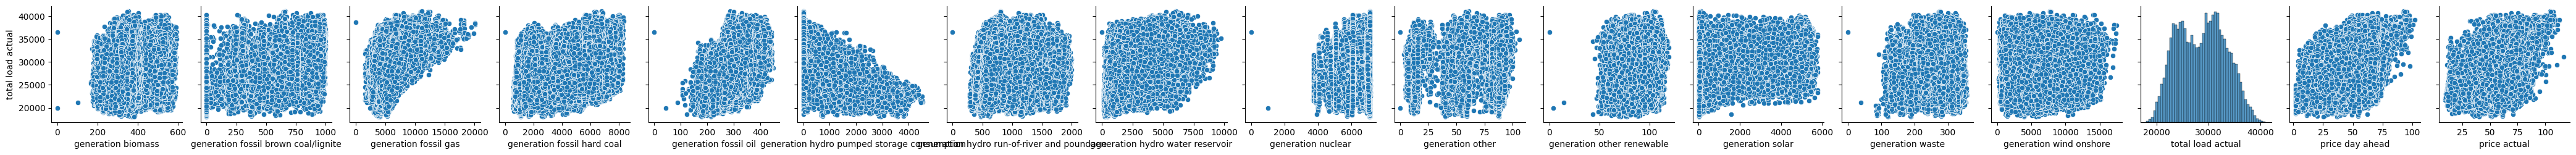

In [ ]:
sns.pairplot(data, y_vars=['total load actual'])  # Specify 'total load actual' as the y-axis variable


<Axes: >

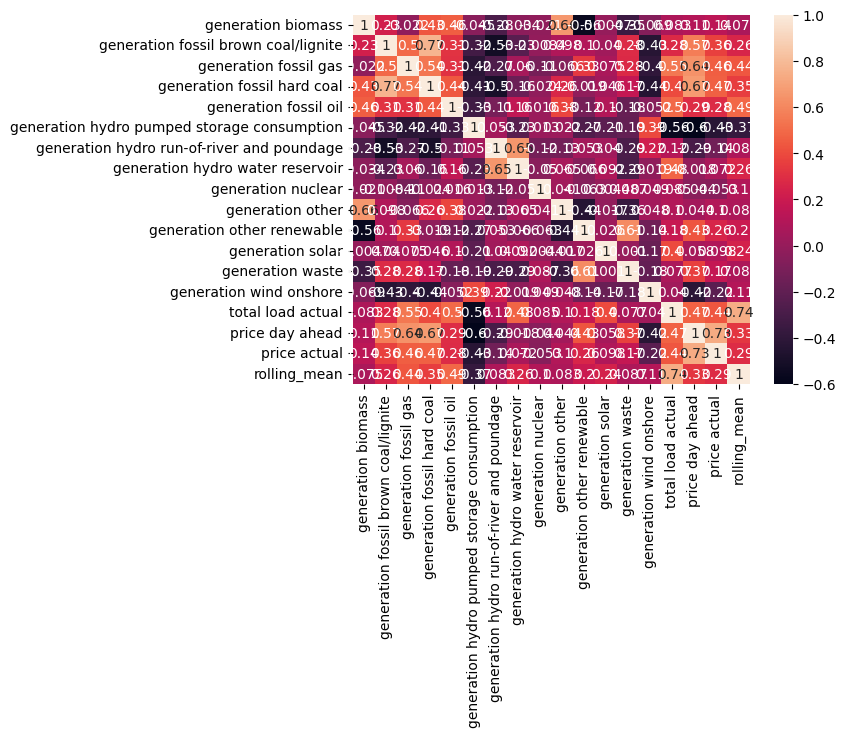

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data = data.drop(columns=['generation fossil coal-derived gas',
                           'generation fossil oil shale',
                           'generation fossil peat',
                           'generation geothermal',
                           'generation hydro pumped storage aggregated',
                           'generation marine',
                           'generation wind offshore',
                           'forecast wind offshore eday ahead',
                           'total load forecast',
                           'forecast solar day ahead',
                           'forecast wind onshore day ahead'],
                errors='ignore')  # Adding errors='ignore' to handle missing columns

# Display the first few rows of the DataFrame to verify changes
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04


<ipython-input-9-3eb1d1b0317e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['total load actual'] = data['total load actual'].fillna(method='ffill')


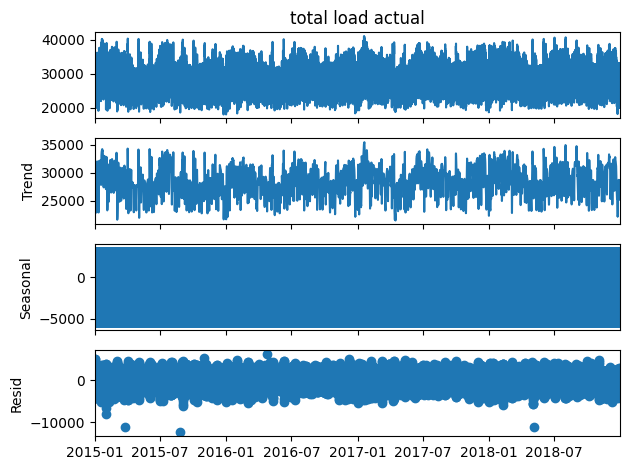

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
data['total load actual'] = data['total load actual'].fillna(method='ffill')

result = seasonal_decompose(data["total load actual"], model="additive", period=24)  # Assuming hourly data
result.plot()
plt.show()

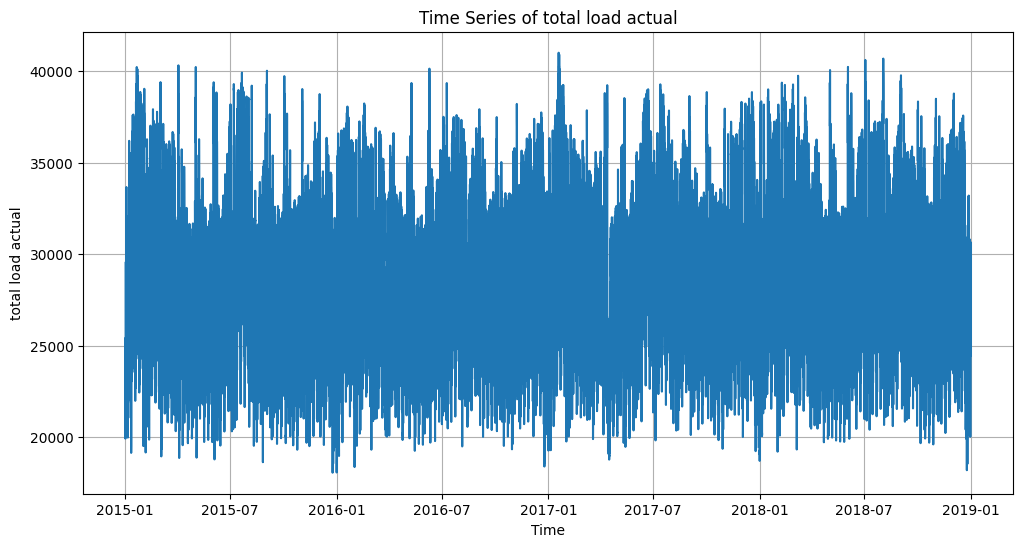

count    35064.000000
mean     28697.608573
std       4575.872425
min      18041.000000
25%      24806.750000
50%      28902.000000
75%      32194.250000
max      41015.000000
Name: total load actual, dtype: float64


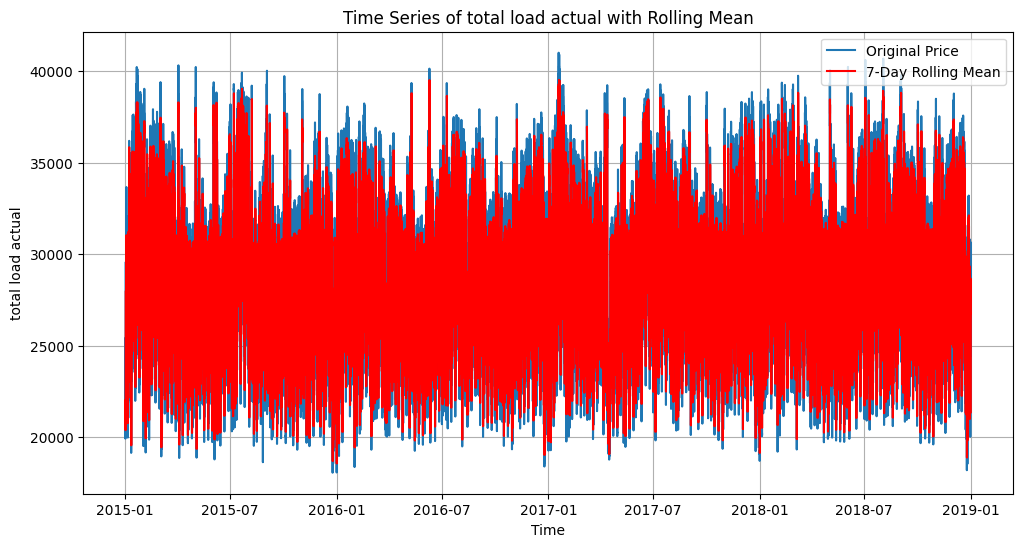

In [ ]:

# want to analyze it as a time series.

import matplotlib.pyplot as plt

# Plot the 'total load actual' over time
plt.figure(figsize=(12, 6))
plt.plot(data['total load actual'])
plt.xlabel('Time')
plt.ylabel('total load actual')
plt.title('Time Series of total load actual')
plt.grid(True)
plt.show()


# Calculate and print basic statistics for the 'total load actual'
print(data['total load actual'].describe())

# Example of using rolling mean to smooth the time series (adjust window size as needed)
data['rolling_mean'] = data['total load actual'].rolling(window=7).mean()  # 7-day rolling mean

# Plot the smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(data['total load actual'], label='Original Price')
plt.plot(data['rolling_mean'], label='7-Day Rolling Mean', color='red')
plt.xlabel('Time')
plt.ylabel('total load actual')
plt.title('Time Series of total load actual with Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()



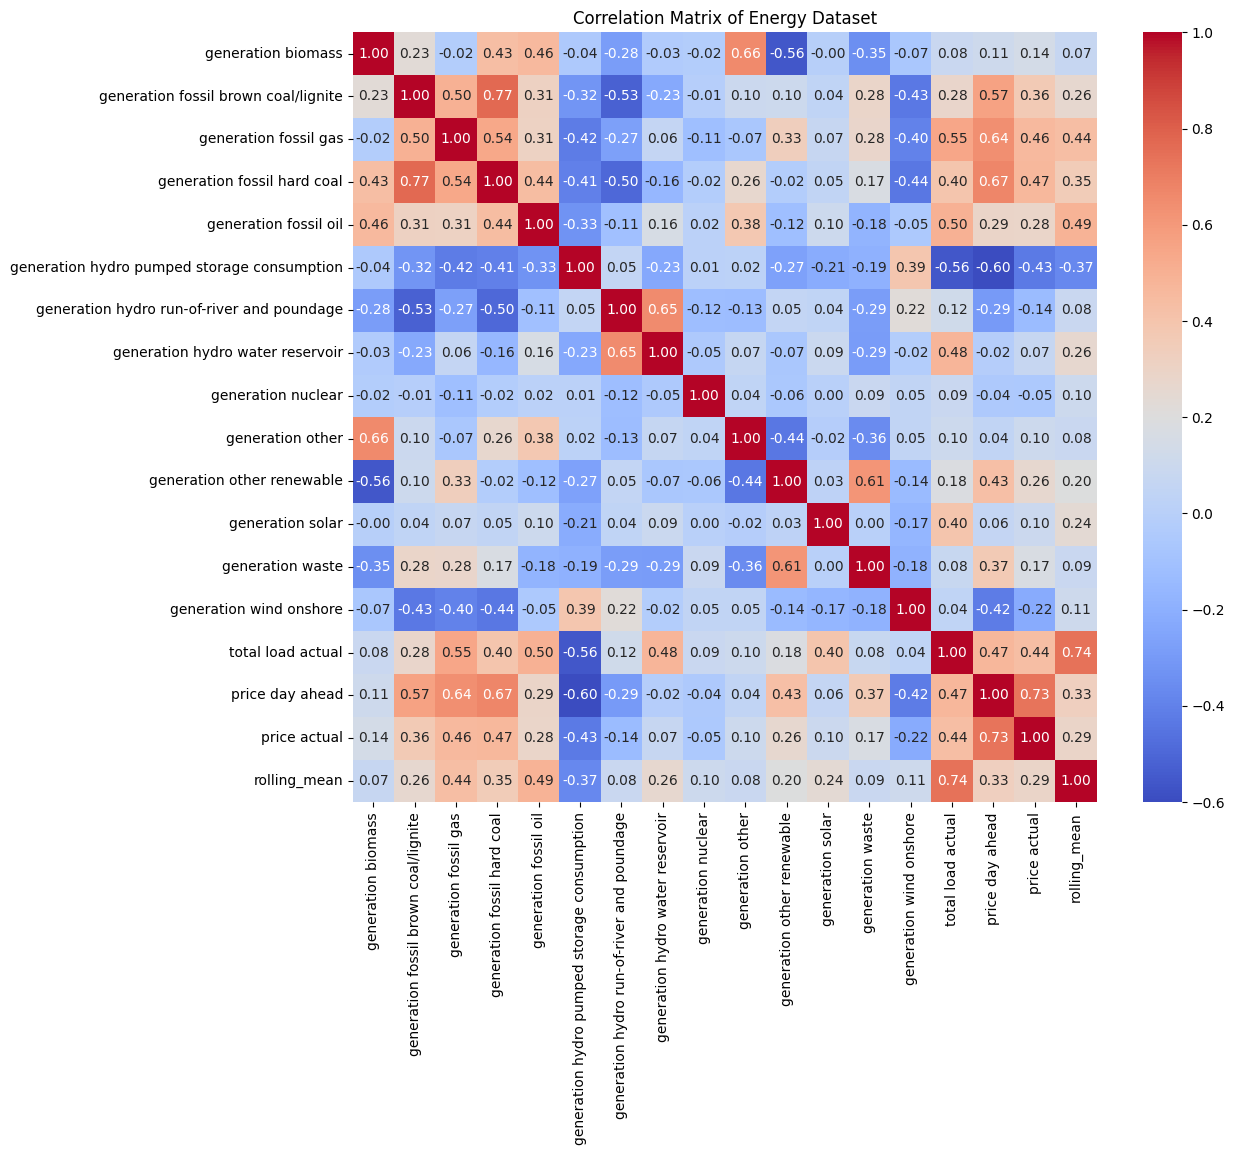

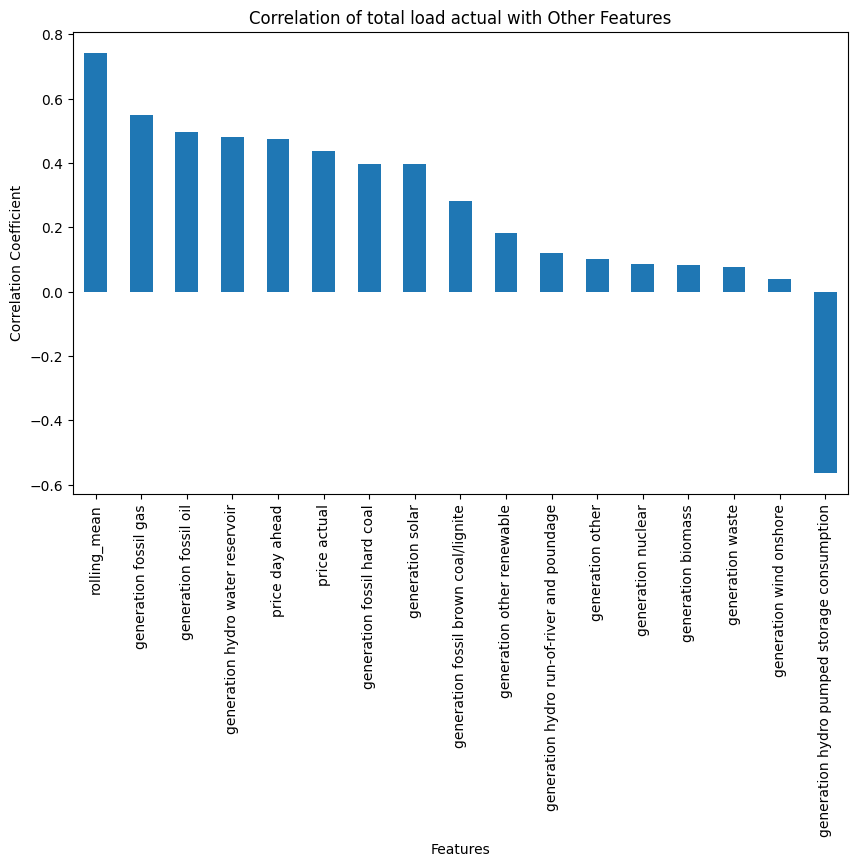

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10)) # Changed plt.pyplot.figure to plt.figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Energy Dataset') # Changed plt.pyplot.title to plt.title
plt.show()

# Plot the correlation between total load actual and other features
plt.figure(figsize=(10, 6)) # Changed plt.pyplot.figure to plt.figure
data.corr()['total load actual'].sort_values(ascending=False).drop('total load actual').plot(kind='bar')
plt.title('Correlation of total load actual with Other Features') # Changed plt.pyplot.title to plt.title
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


(35064, 17)
(35064,)
                           generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               False   
2015-01-01 01:00:00+01:00               False   
2015-01-01 02:00:00+01:00               False   
2015-01-01 03:00:00+01:00               False   
2015-01-01 04:00:00+01:00               False   
...                                       ...   
2018-12-31 19:00:00+01:00               False   
2018-12-31 20:00:00+01:00               False   
2018-12-31 21:00:00+01:00               False   
2018-12-31 22:00:00+01:00               False   
2018-12-31 23:00:00+01:00               False   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 False   
2015-01-01 01:00:00+01:00                                 False   
2015-01-01 02:00:00+01:00                                 False   
2015-0

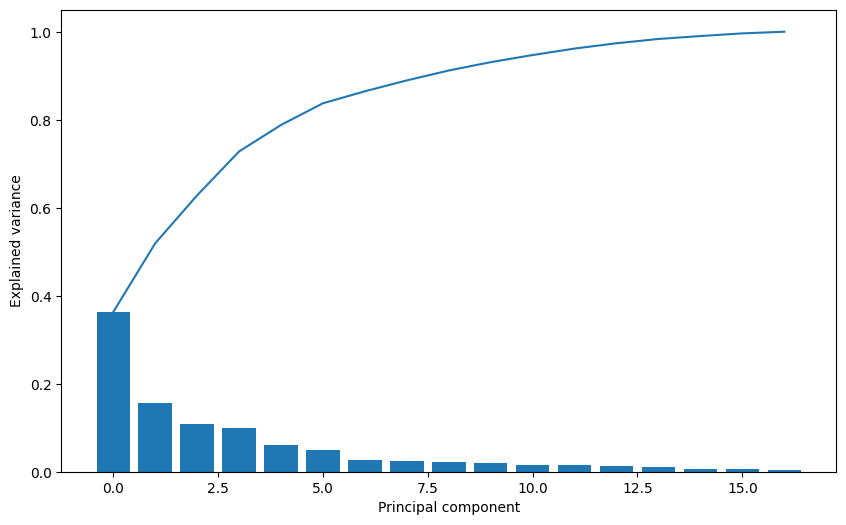

In [ ]:
x_feature, y = data.drop("total load actual", axis=1), data["total load actual"]
print(x_feature.shape)
print(y.shape)
print(x_feature.isna())  # Detect NaN
print(x_feature.isna().sum())  # Count NaN
print(x_feature.columns[x_feature.isna().any()].tolist())
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_feature = imputer.fit_transform(x_feature)
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))
y_scalar = preprocessing.MinMaxScaler()
y = y_scalar.fit_transform(y.reshape(-1, 1))
scaler = preprocessing.MinMaxScaler()
x_feature = scaler.fit_transform(x_feature)



import matplotlib.pyplot as plt
#dimension reduction
pca = PCA()
eigen = pca.fit_transform(x_feature)
eigen = pd.DataFrame(eigen)
x_train,x_test,y_train,y_test = train_test_split(eigen,y,test_size=0.2,shuffle=False)
X_train = []
Y_train = []
for i in range(1, len(x_train)):
    X_train.append(x_train.iloc[i-1:i])
    Y_train.append(y_train[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])

num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()


In [ ]:
#test sliding window data
X_test = []
Y_test = []
for i in range(1,len(x_test)):
    X_test.append(x_test.iloc[i-1:i])
    Y_test.append(y_test[i,0])
X_test,Y_test = np.array(X_test),np.array(Y_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2])


In [ ]:
# train linear regression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9133779045788513
0.8939158897449472


In [ ]:
#LSTM rnn time price forecasting hours forecast
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Changed input_shape
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=100, batch_size=32)
model.save('my_model.keras')
!cp my_model.keras /content/drive/MyDrive/

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0436
Epoch 2/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0076
Epoch 3/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0071
Epoch 4/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0065
Epoch 5/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0063
Epoch 6/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0061
Epoch 7/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0058
Epoch 8/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0058
Epoch 9/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0056
Epoch 10/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0054
Epoch 11/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0054
Epoch 12/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0053
Epoch 13/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0053
Epoch 14/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0052
Epoch 15/100
877/877 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step -

one week forecasting data

In [ ]:
from tensorflow.keras.models import load_model # Import the load_model function

model = load_model('my_modelRNN3.keras')
model.summary()
loss = model.evaluate(X_test, Y_test)
Y_predict = model.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
print("Loss:", loss)
print("R-squared:", r2)
y_predict = y_scalar.inverse_transform(Y_predict)
y_test = y_scalar.inverse_transform(Y_test.reshape(-1, 1))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 168, 50)             │          13,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 168, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 168, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 168, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,555 (631.08 KB)

 Trainable params: 53,851 (210.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,704 (420.72 KB)

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0044
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Loss: 0.004837745800614357
R-squared: 0.8744355875231593


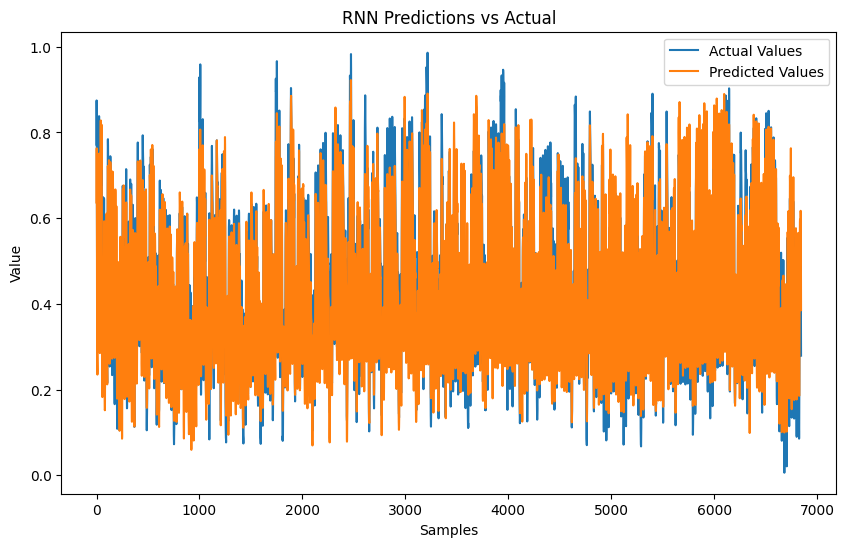

<ipython-input-12-884e626e8ecd>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.flatten(), label='Actual Values')
<ipython-input-12-884e626e8ecd>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_predict.flatten(), label='Predicted Values')


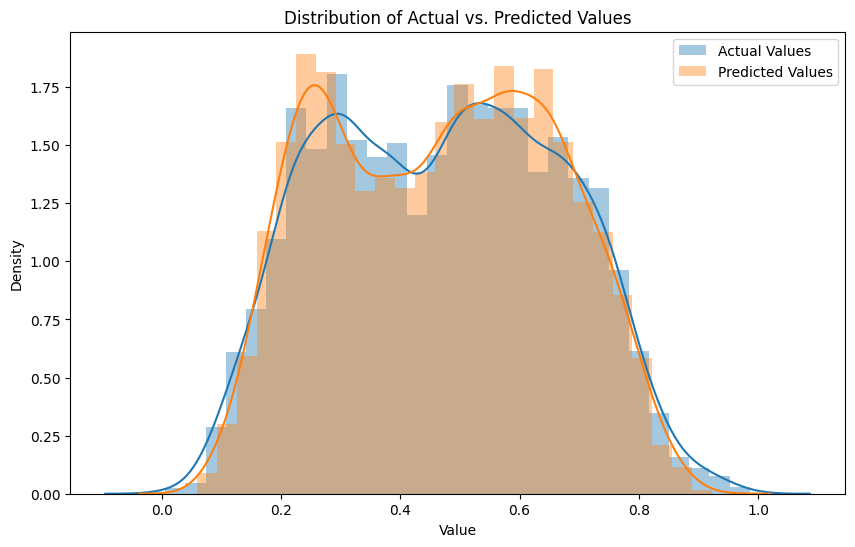

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(Y_test)), y=Y_test.flatten(), label='Actual Values') # Flattening y_test
sns.lineplot(x=np.arange(len(Y_predict)), y=Y_predict.flatten(), label='Predicted Values') # Flattening y_predict

plt.title('RNN Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()
# normal distribution of test and pred

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(Y_test.flatten(), label='Actual Values')
sns.distplot(Y_predict.flatten(), label='Predicted Values')

plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

4 hour forecasting

In [ ]:
model = load_model('my_modelRNN2.keras')
model.summary()
loss = model.evaluate(X_test, Y_test)
Y_predict = model.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
print("Loss:", loss)
print("R-squared:", r2)
y_predict = y_scalar.inverse_transform(Y_predict)
y_test = y_scalar.inverse_transform(Y_test.reshape(-1, 1))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 4, 50)               │          13,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 4, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,555 (631.08 KB)

 Trainable params: 53,851 (210.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,704 (420.72 KB)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Loss: 0.00453277537599206
R-squared: 0.8827860616241237


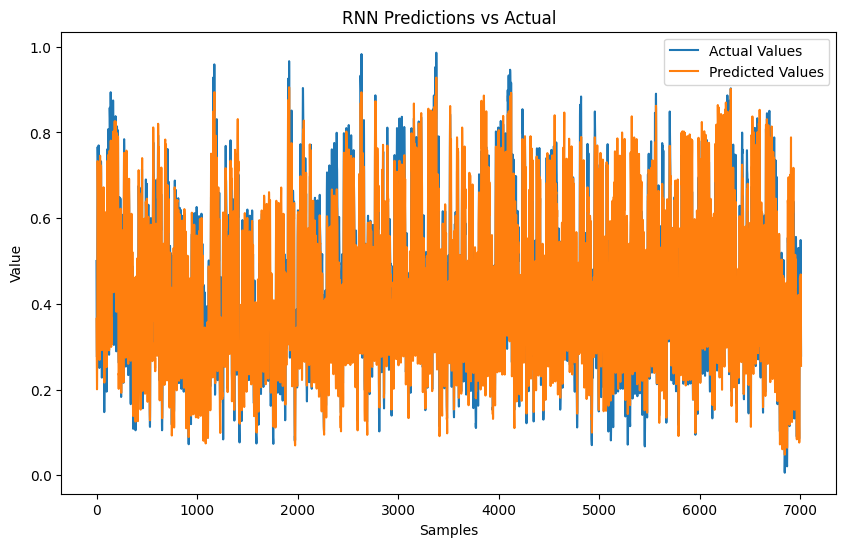

<ipython-input-18-884e626e8ecd>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.flatten(), label='Actual Values')
<ipython-input-18-884e626e8ecd>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_predict.flatten(), label='Predicted Values')


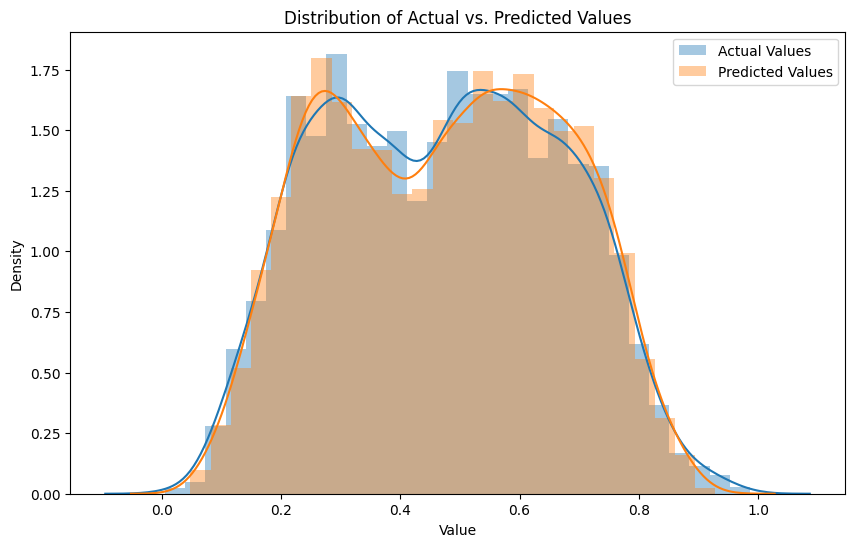

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(Y_test)), y=Y_test.flatten(), label='Actual Values') # Flattening y_test
sns.lineplot(x=np.arange(len(Y_predict)), y=Y_predict.flatten(), label='Predicted Values') # Flattening y_predict

plt.title('RNN Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()
# normal distribution of test and pred

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(Y_test.flatten(), label='Actual Values')
sns.distplot(Y_predict.flatten(), label='Predicted Values')

plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

12 hour forecasting


In [ ]:
#sliding window 12 hr version
model = load_model('my_modelRNN1.keras')
model.summary()
loss = model.evaluate(X_test, Y_test)
Y_predict = model.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
print("Loss:", loss)
print("R-squared:", r2)
y_predict = y_scalar.inverse_transform(Y_predict)
y_test = y_scalar.inverse_transform(Y_test.reshape(-1, 1))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 12, 50)              │          13,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 12, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,155 (633.42 KB)

 Trainable params: 54,051 (211.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,104 (422.29 KB)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.8127e-04
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Loss: 0.0008499706746079028
R-squared: 0.9780323631576929


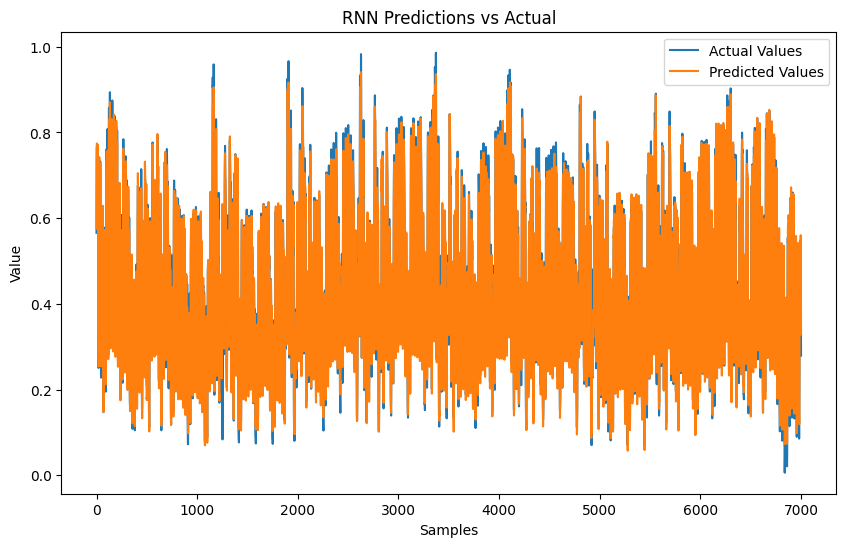

<ipython-input-28-884e626e8ecd>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.flatten(), label='Actual Values')
<ipython-input-28-884e626e8ecd>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_predict.flatten(), label='Predicted Values')


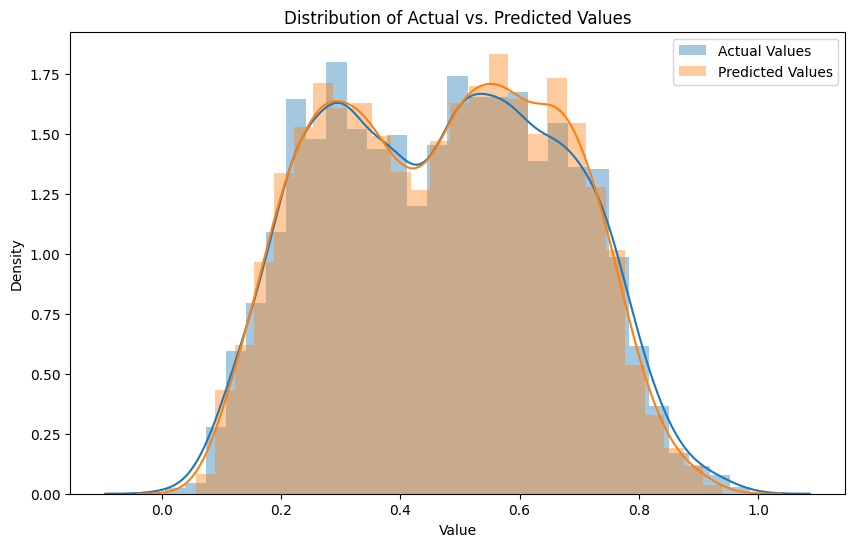

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(Y_test)), y=Y_test.flatten(), label='Actual Values') # Flattening y_test
sns.lineplot(x=np.arange(len(Y_predict)), y=Y_predict.flatten(), label='Predicted Values') # Flattening y_predict

plt.title('RNN Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()
# normal distribution of test and pred

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(Y_test.flatten(), label='Actual Values')
sns.distplot(Y_predict.flatten(), label='Predicted Values')

plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

sliding window 24hr sequence dataset

In [ ]:
#sliding window version
model = load_model('my_modelRNN.keras')
model.summary()
loss = model.evaluate(X_test, Y_test)
Y_predict = model.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
print("Loss:", loss)
print("R-squared:", r2)
y_predict = y_scalar.inverse_transform(Y_predict)
y_test = y_scalar.inverse_transform(Y_test.reshape(-1, 1))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 24, 50)              │          13,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 24, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,155 (633.42 KB)

 Trainable params: 54,051 (211.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,104 (422.29 KB)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6966e-04
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Loss: 0.0008254846907220781
R-squared: 0.9786566491095399


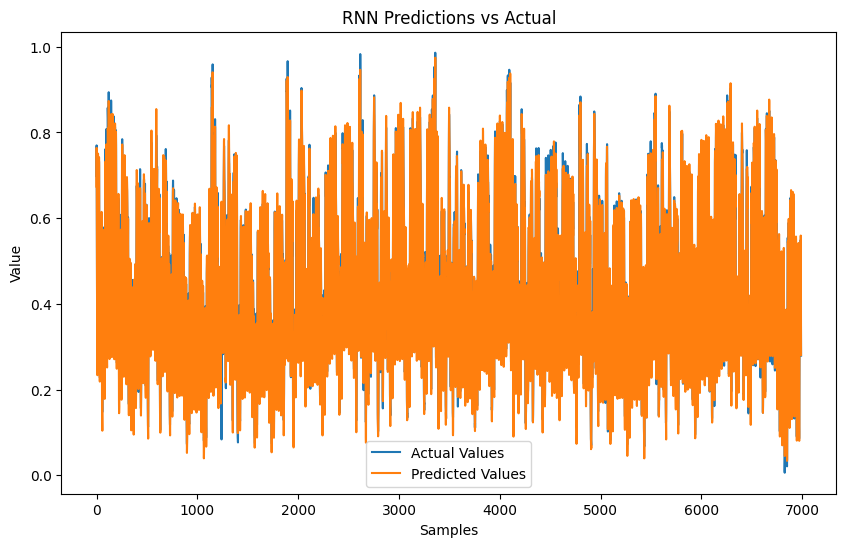

<ipython-input-33-884e626e8ecd>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.flatten(), label='Actual Values')
<ipython-input-33-884e626e8ecd>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_predict.flatten(), label='Predicted Values')


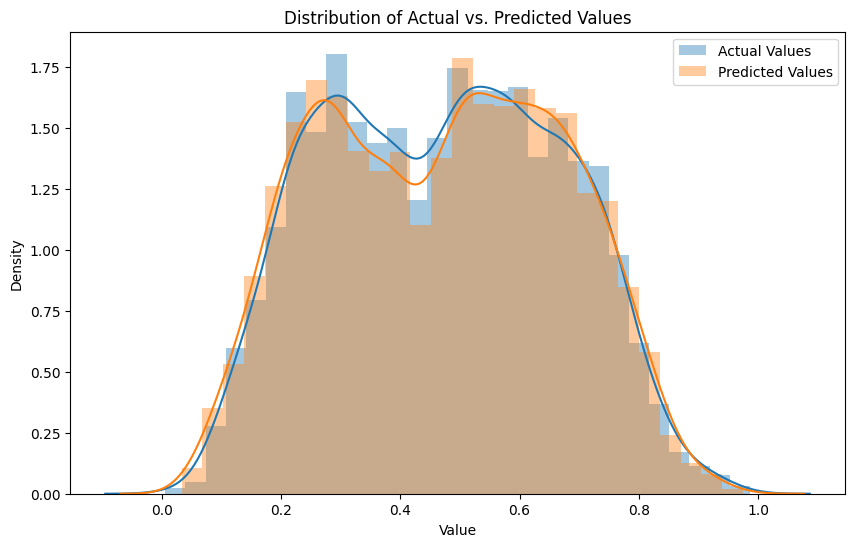

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(Y_test)), y=Y_test.flatten(), label='Actual Values') # Flattening y_test
sns.lineplot(x=np.arange(len(Y_predict)), y=Y_predict.flatten(), label='Predicted Values') # Flattening y_predict

plt.title('RNN Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()
# normal distribution of test and pred

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(Y_test.flatten(), label='Actual Values')
sns.distplot(Y_predict.flatten(), label='Predicted Values')

plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
#training with no sequence length
from tensorflow.keras.models import load_model
model_path ='/content/drive/MyDrive/my_model.keras'
model = load_model(model_path)

model.summary()
loss = model.evaluate(X_test, Y_test)
Y_predict = model.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
print("Loss:", loss)
print("R-squared:", r2)
y_predict = y_scalar.inverse_transform(Y_predict)
y_test = y_scalar.inverse_transform(Y_test.reshape(-1, 1))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 1, 50)               │          13,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,155 (633.42 KB)

 Trainable params: 54,051 (211.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,104 (422.29 KB)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0051
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Loss: 0.005556177813559771
R-squared: 0.8563655352730879


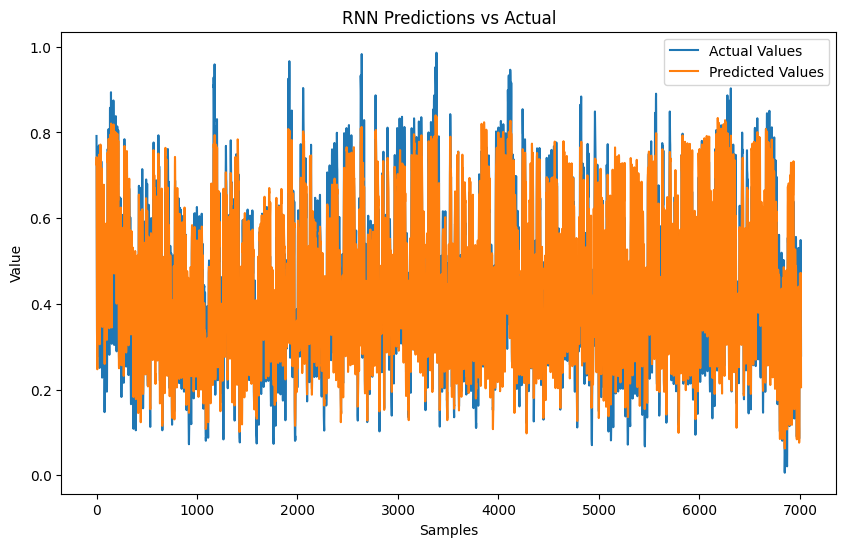

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(y_test)), y=Y_test.flatten(), label='Actual Values') # Flattening y_test
sns.lineplot(x=np.arange(len(y_predict)), y=Y_predict.flatten(), label='Predicted Values') # Flattening y_predict

plt.title('RNN Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

<ipython-input-51-041252c94283>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test.flatten(), label='Actual Values')
<ipython-input-51-041252c94283>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict.flatten(), label='Predicted Values')


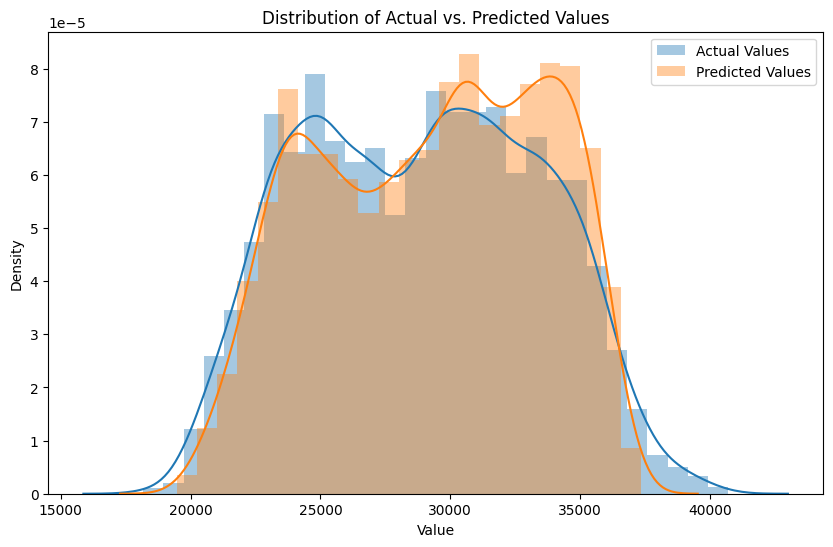

In [ ]:
# normal distribution of test and pred

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(y_test.flatten(), label='Actual Values')
sns.distplot(y_predict.flatten(), label='Predicted Values')

plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
#implement weather dataset?
file_path = '/content/drive/MyDrive/weather.csv'

data = pd.read_csv(file_path)
data.head()
sns.pairplot(data)